In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['label','text'])

In [3]:
data

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [4]:
# CORPUS = all
# DOCUMENT = ONE
# TF = TF > IDF = not important
# IDF = TF < IDF = Important

# Feature Engineering

In [5]:
data['text_length'] = data['text'].apply(lambda x :len(x))

# Clean The SMS

In [6]:
def clean_text(x):
    letter_only = re.sub('(^a-zA-Z)',' ', x )
    return ' '.join(letter_only.split()).lower()

In [7]:
data['clean_text'] = data['text'].apply(clean_text)

In [8]:
data['clean_text_length'] = data['clean_text'].apply(lambda x : len(x))

In [9]:
data.head()

,label,text,text_length,clean_text,clean_text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",111
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",61


# Find meaningful Word on every document

In [10]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [11]:
count_vectorizer_transformer = CountVectorizer().fit(data['clean_text'])

In [12]:
count_vectorizer_res = count_vectorizer_transformer.transform(data['clean_text'])

In [13]:
pd.DataFrame(count_vectorizer_res.todense(), columns = count_vectorizer_transformer.get_feature_names())

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
tf_idf_transformer = TfidfTransformer().fit(count_vectorizer_res)
tf_idf_res = tf_idf_transformer.transform(count_vectorizer_res)

In [15]:
df_tf_idf = pd.DataFrame(tf_idf_res.todense(), columns = count_vectorizer_transformer.get_feature_names())

In [16]:
df_tf_idf.iloc[0].sort_values(ascending = False).head(3)

jurong    0.326472
amore     0.326472
buffet    0.311653
Name: 0, dtype: float64

In [17]:
listMeaning = []
for item in range(len(data)):
    mean_ing = list(df_tf_idf.iloc[item].sort_values(ascending = False).head(3).index)
    listMeaning.append(mean_ing)

In [18]:
data['meaningful_words'] = listMeaning

In [19]:
data.head()

,label,text,text_length,clean_text,clean_text_length,meaningful_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,"go until jurong point, crazy.. available only ...",111,"[jurong, amore, buffet]"
1,ham,Ok lar... Joking wif u oni...,29,ok lar... joking wif u oni...,29,"[oni, joking, wif]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry in 2 a wkly comp to win fa cup fina...,155,"[fa, entry, 08452810075over18]"
3,ham,U dun say so early hor... U c already then say...,49,u dun say so early hor... u c already then say...,49,"[say, hor, early]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"nah i don't think he goes to usf, he lives aro...",61,"[he, lives, nah]"


# EDA

In [20]:
all_words = ' '.join(list(data['clean_text']))

In [21]:
list_all_words = all_words.split() 

In [22]:
from collections import Counter

In [23]:
word_count = Counter(list_all_words)

In [24]:
most_appeared_word = pd.Series(word_count).sort_values(ascending = False).head(20)

In [45]:
dfx = pd.DataFrame(most_appeared_word).reset_index()

In [47]:
dfx

,index,0
0,to,2237
1,i,2217
2,you,1921
3,a,1433
4,the,1329
5,u,998
6,and,968
7,is,869
8,in,859
9,my,755


In [25]:
sns.set_style('whitegrid')

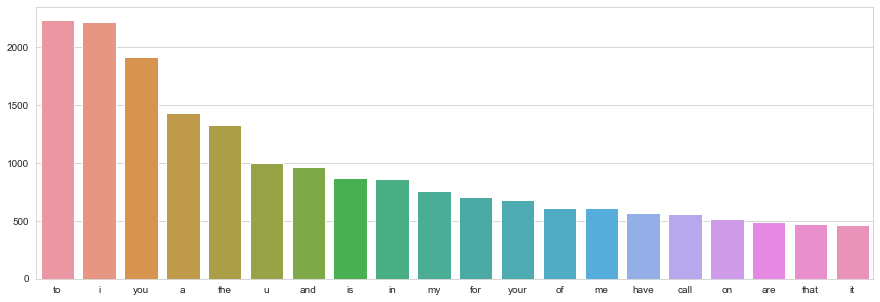

In [26]:
plt.figure(figsize = (15,5))
sns.barplot(most_appeared_word.index, most_appeared_word.values)

In [27]:
def uwuwu(x):
    all_words = ' '.join(list(x))
    list_all_words = all_words.split()
    word_count = Counter(list_all_words)
    most_appeared_word = pd.Series(word_count).sort_values(ascending = False).head(20)
    plt.figure(figsize = (15,5))
    sns.barplot(most_appeared_word.index, most_appeared_word.values)

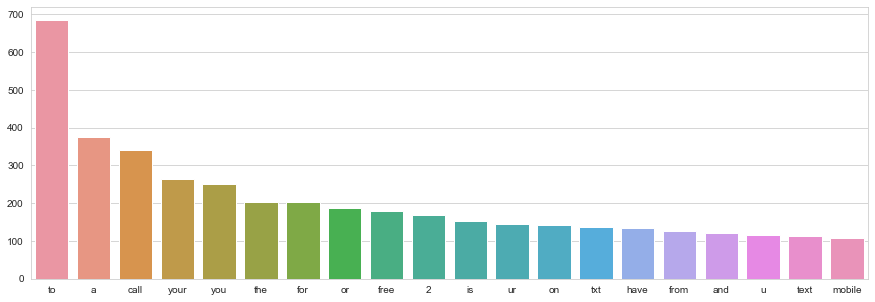

In [28]:
uwuwu(data[data['label'] == 'spam']['clean_text'])

In [29]:
import nltk

In [30]:
from nltk.corpus import stopwords

In [31]:
def uwuwuw(x):
    all_words = ' '.join(list(x))
    list_all_words = all_words.split()
    word_count = Counter(list_all_words)
    word_count_series = pd.Series(word_count)
    word_stopwords = []
    for item in word_count_series.index:
        if(item not in stopwords.words('english')):
            word_stopwords.append(item)
    word_count_series = word_count_series.loc[word_stopwords]
    most_appeared_word = word_count_series.sort_values(ascending = False).head(20)
    plt.figure(figsize = (15,5))
    sns.barplot(most_appeared_word.index, most_appeared_word.values)

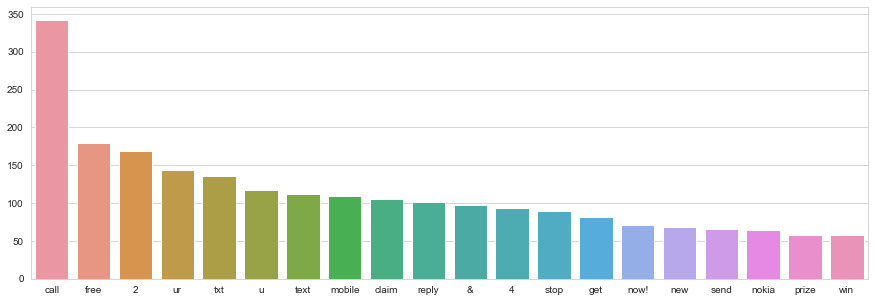

In [32]:
uwuwuw(data[data['label'] == 'spam']['clean_text'])

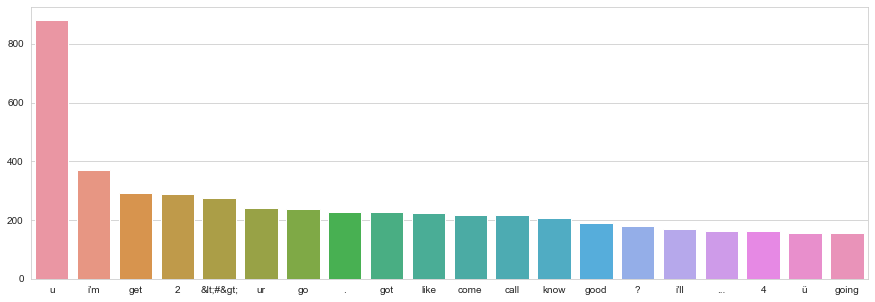

In [33]:
uwuwuw(data[data['label'] == 'ham']['clean_text'])

In [34]:
new_meaningful = [' '.join(item) for item in data['meaningful_words']]

/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/mac/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 12328 missing from current font.
  font.set_text(s, 0, flags=flags)


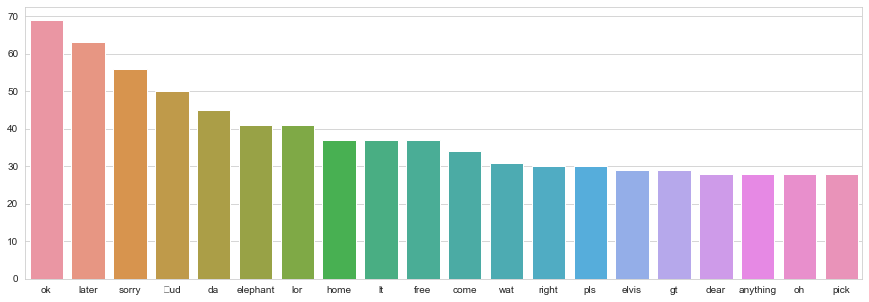

In [35]:
uwuwuw(pd.Series(new_meaningful))

In [36]:
from wordcloud import WordCloud

In [37]:
wc = WordCloud(background_color = 'white', max_font_size=40, max_words = 200)

In [38]:
my_wc = wc.generate('aku aku kamu') 

ValueError: Illegal interpolation string

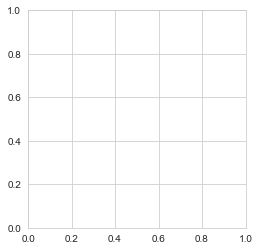

In [39]:
plt.figure(figsize = (15,4))
plt.imshow(my_wc,interpolation = 'billnear')
plt.show()

In [ ]:
def show_wordclud(text):
    wc = WordCloud(background_color = 'white', max_font_size=40, max_words = 200)
    my_wc = wc.generate(text)
    plt.figure(figsize = (20,5))
    plt.imshow(my_wc,interpolation = 'billnear')
    plt.axis('off')
    plt.show()

In [ ]:
show_wordclud(' '.join(list(data['text'])))

# Modelling

In [40]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# Sparse Matrix dari TF/IDF

In [41]:
X_train,X_test,y_train,y_test = train_test_split(tf_idf_res, data['label'], random_state = 101)

In [42]:
model_nlb = MultinomialNB().fit(X_train,y_train)
prediction = model_nlb.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1227
        spam       1.00      0.64      0.78       166

    accuracy                           0.96      1393
   macro avg       0.98      0.82      0.88      1393
weighted avg       0.96      0.96      0.95      1393



In [43]:
mes = 'im horny, call me now'
cv = count_vectorizer_transformer.transform([mes])
tf = tf_idf_transformer.transform(cv)
model_nlb.predict(tf)

array(['ham'], dtype='<U4')